# Mag TOV (Uniform Grid)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

M/day
       G32: [ 2.62e+03, 5.05e+03, 9.14e+03, 1.51e+04, 1.96e+04,]
       G64: [ 4.49e+03, 8.48e+03, 1.51e+04, 2.17e+04, 2.66e+04,]
      G128: [ 5.18e+03, 9.66e+03, 1.63e+04, 2.54e+04, 2.98e+04,]
      G256: [ 5.21e+03, 9.66e+03, 1.67e+04, 2.51e+04, 3.07e+04,]
       G64: [ 1.12e+03, 2.09e+03, 3.44e+03,]
      G128: [ 6.48e+02, 1.25e+03, 2.35e+03, 4.07e+03, 6.21e+03,]
      G256: [ 6.50e+02, 1.26e+03, 2.38e+03, 4.13e+03, 6.39e+03,]
      G512: [ 6.46e+02, 1.25e+03, 2.38e+03, 4.15e+03, 6.30e+03,]
      G128: [ 1.95e+02, 5.45e+02, 9.85e+02,]
      G256: [ 2.98e+02, 5.59e+02, 7.68e+02,]
      G512: [ 3.03e+02, 5.64e+02, 9.81e+02,]
Zcs/sec
       G32: [ 1.29e+07, 2.49e+07, 4.50e+07, 7.42e+07, 9.68e+07,]
       G64: [ 2.21e+07, 4.18e+07, 7.46e+07, 1.07e+08, 1.31e+08,]
      G128: [ 2.56e+07, 4.77e+07, 8.03e+07, 1.25e+08, 1.47e+08,]
      G256: [ 2.57e+07, 4.77e+07, 8.26e+07, 1.24e+08, 1.51e+08,]
       G64: [ 8.79e+07, 1.65e+08, 2.73e+08,]
      G128: [ 5.08e+07, 9.86e+07, 1.86e+08, 3.

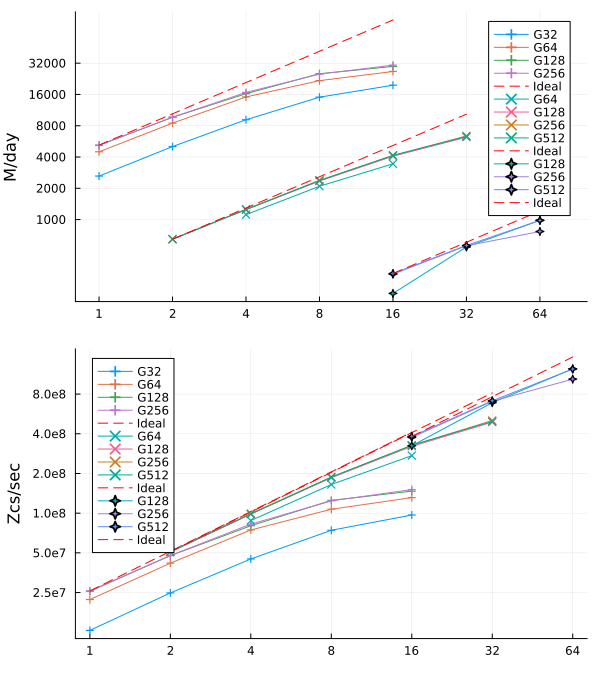

In [2]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/magTOV-n256", :cross),
        ([
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/magTOV-n512", :xcross),
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/magTOV-n1024", :star4),
    ]

    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10, xlim=(0.8, 100))
    xs = [1, 2, 4, 8, 16, 32, 64]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1000, 2000, 4000, 8000, 16000, 32000]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime", is_plot_ideal=true, is_print_value=true)

    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16, 32, 64]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [2.5e7, 5e7, 1e8, 2e8, 4e8, 8e8]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)

    # Sum
    plt = plot(plt1, plt2, layout=(2,1), size = (600, 675))
    display(plt)
end

## Speed

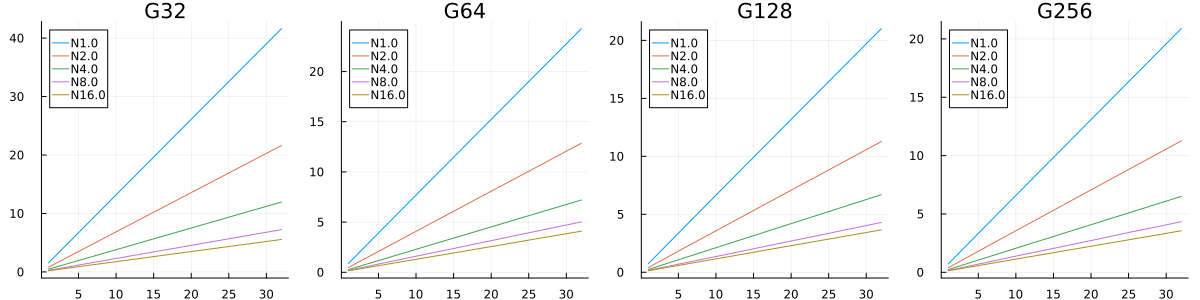

In [3]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/magTOV-n256", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end

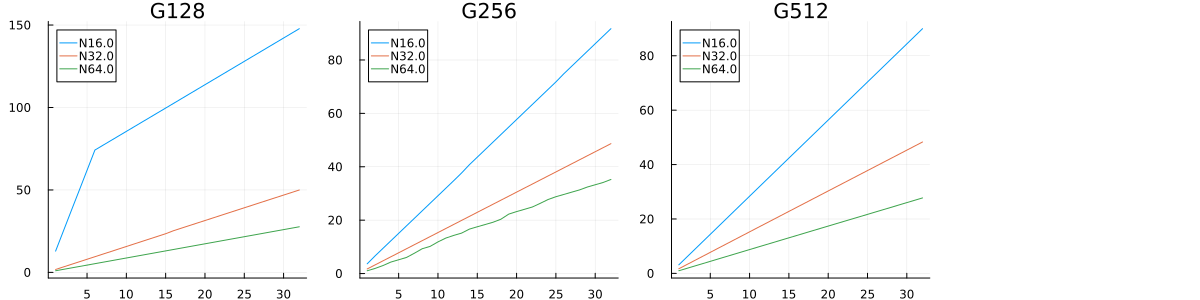

In [4]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/magTOV-n1024", :star4),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end

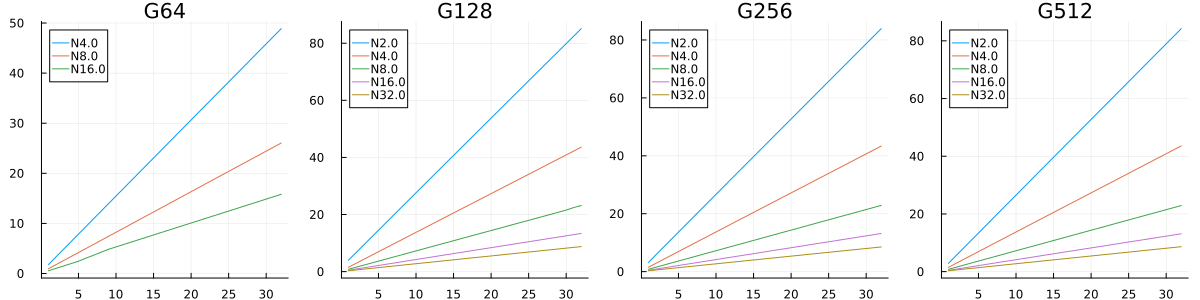

In [5]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/magTOV-n512", :xcross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end

### grid = $256 \times 256 \times 256$

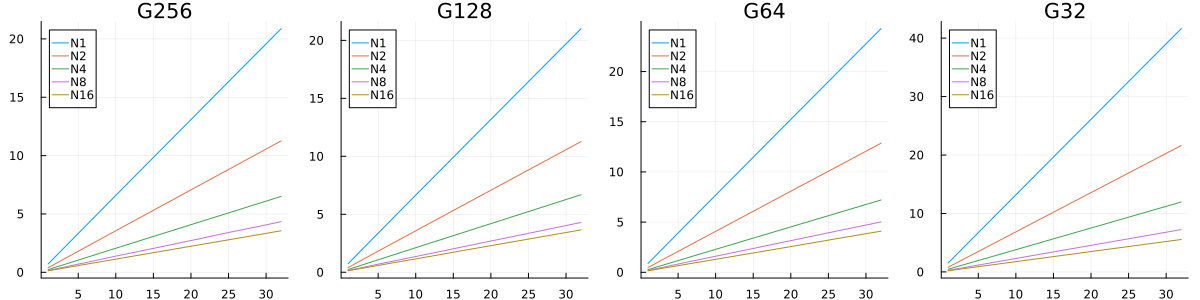

In [6]:
let dirss = [
    ([
        ("Cow_UNI_G256-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G256-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G256-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G256-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G256-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G256"),
    ([
        ("Cow_UNI_G128-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G128-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G128-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G128-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G128-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G128"),
    ([
        ("Cow_UNI_G64-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G64-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G64-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G64-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G64-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G64"),
    ([
        ("Cow_UNI_G32-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G32-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G32-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G32-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G32-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G32"),
    ]

    plts = []
    for dirs in dirss
        (dats, labs) = Misc.load_data(dirs[1], "../data/magTOV/magTOV-n256", "TotalComputeTime")
        #
        tit = dirs[2]
        plt = plot(title = "$tit")
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[3], label=labs[i])
        end
        push!(plts, plt)
    end

    plt_grid = plot(plts..., layout=(1, 4), size=(1200, 300))
    display(plt_grid)
end

### grid = $512 \times 512 \times 512$

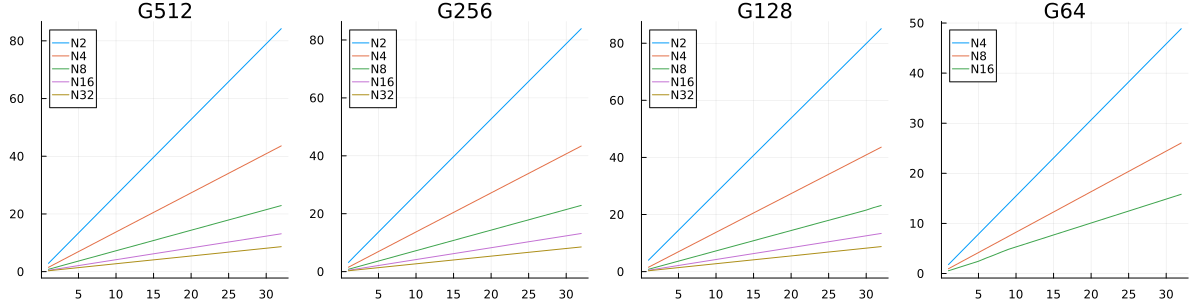

In [7]:
let dirss = [
    ([
        ("Cow_UNI_G512-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G512-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G512-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G512-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G512-N32-MPI32_r0000/stdout.txt", "N32"),
    ], "G512"),
    ([
        ("Cow_UNI_G256-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G256-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G256-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G256-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G256-N32-MPI32_r0000/stdout.txt", "N32"),
    ], "G256"),
    ([
        ("Cow_UNI_G128-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G128-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G128-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G128-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G128-N32-MPI32_r0000/stdout.txt", "N32"),
    ], "G128"),
    ([
        ("Cow_UNI_G64-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G64-N8-MPI8_r0000/stdout.txt", "N8"),
        ("Cow_UNI_G64-N16-MPI16_r0000/stdout.txt", "N16"),
    ], "G64"),
    ]

    plts = []
    for dirs in dirss
        (dats, labs) = Misc.load_data(dirs[1], "../data/magTOV/magTOV-n512", "TotalComputeTime")
        #
        tit = dirs[2]
        plt = plot(title = "$tit")
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[3], label=labs[i])
        end
        push!(plts, plt)
    end

    plt_grid = plot(plts..., layout=(1, 4), size=(1200, 300))
    display(plt_grid)
end

### grid = $1024 \times 1024 \times 1024$

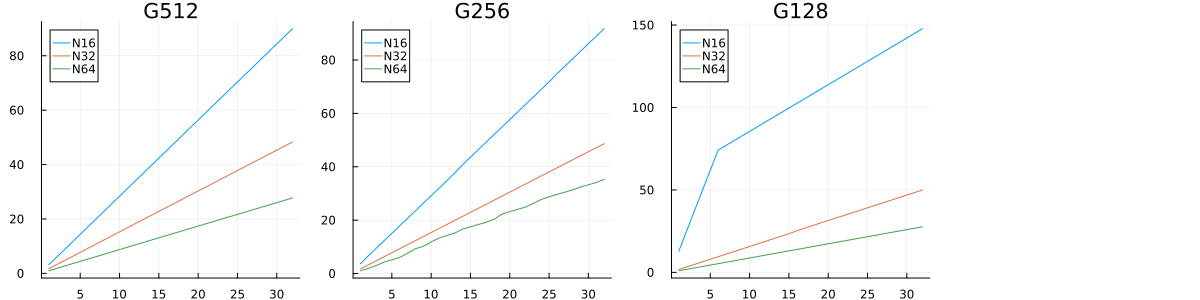

In [8]:
let dirss = [
    ([
        ("Cow_UNI_G512-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G512-N32-MPI32_r0000/stdout.txt", "N32"),
        ("Cow_UNI_G512-N64-MPI64_r0000/stdout.txt", "N64"),
    ], "G512"),
    ([
        ("Cow_UNI_G256-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G256-N32-MPI32_r0000/stdout.txt", "N32"),
        ("Cow_UNI_G256-N64-MPI64_r0000/stdout.txt", "N64"),
    ], "G256"),
    ([
        ("Cow_UNI_G128-N16-MPI16_r0000/stdout.txt", "N16"),
        ("Cow_UNI_G128-N32-MPI32_r0000/stdout.txt", "N32"),
        ("Cow_UNI_G128-N64-MPI64_r0000/stdout.txt", "N64"),
    ], "G128"),
    ]

    plts = []
    for dirs in dirss
        (dats, labs) = Misc.load_data(dirs[1], "../data/magTOV/magTOV-n1024", "TotalComputeTime")
        #
        tit = dirs[2]
        plt = plot(title = "$tit")
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[3], label=labs[i])
        end
        push!(plts, plt)
    end

    plt_grid = plot(plts..., layout=(1, 4), size=(1200, 300))
    display(plt_grid)
end